# CAPSTONE PROJECT

This notebook will examine the risk of a driver to fall victim to a severe car accident by determining weather conditions and other factors from a given dataset.


In [1]:
import pandas as pd
import numpy as np

In [ ]:
print('Hello Capstone Project Course!')

In [166]:
#Download Data
df= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Get to know the data by checking the dataframe's dimensions/shape and the first rows
print(df.shape)
df.head()

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [15]:
# Get a column list and check which one to drop
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [21]:
#Check what columns stand for
df[['SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC','SEGLANEKEY']].head()

,SDOT_COLCODE,SDOT_COLDESC,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY
0,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,10,Entering at angle,0
1,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",6354039.0,11,From same direction - both going straight - bo...,0
2,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",4323031.0,32,One parked--one moving,0
3,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,23,From same direction - all others,0
4,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",4028032.0,10,Entering at angle,0


In [167]:
#Drop unnecessary columns
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE','SDOT_COLDESC','SDOTCOLNUM', 'ST_COLDESC'], axis = 1, inplace= True)

In [168]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,...,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,...,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,...,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,...,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


In [169]:
#Check if data is balanced or not
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
#Drop unneccessary data
df["ROADCOND"].value_counts() #9 variables

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [12]:
df["WEATHER"].value_counts() #11 variables

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [14]:
df["LIGHTCOND"]#9 variables 

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [170]:
#Convert INCDATE
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM'].head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: INCDTTM, dtype: datetime64[ns]

In [293]:
#Group Data to plot
df_nature = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
df_nature = pd.get_dummies(df_nature)
df_nature.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [294]:
df_nature = pd.concat([df['SEVERITYCODE'], df_nature], axis = 1)

In [295]:
grouped = df_nature.groupby('SEVERITYCODE')
stats_nature = grouped.sum()

In [137]:
stats_nature.head()


,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,416.0,0.0,3.0,99.0,85.0,1.0,5.0,53.0,480.0,2.0,...,123.0,5.0,3.0,151.0,1.0,8.0,425.0,22.0,4.0,44.0
2,199.0,1.0,2.0,34.0,35.0,0.0,0.0,3.0,223.0,0.0,...,46.0,0.0,3.0,56.0,0.0,5.0,194.0,14.0,0.0,2.0


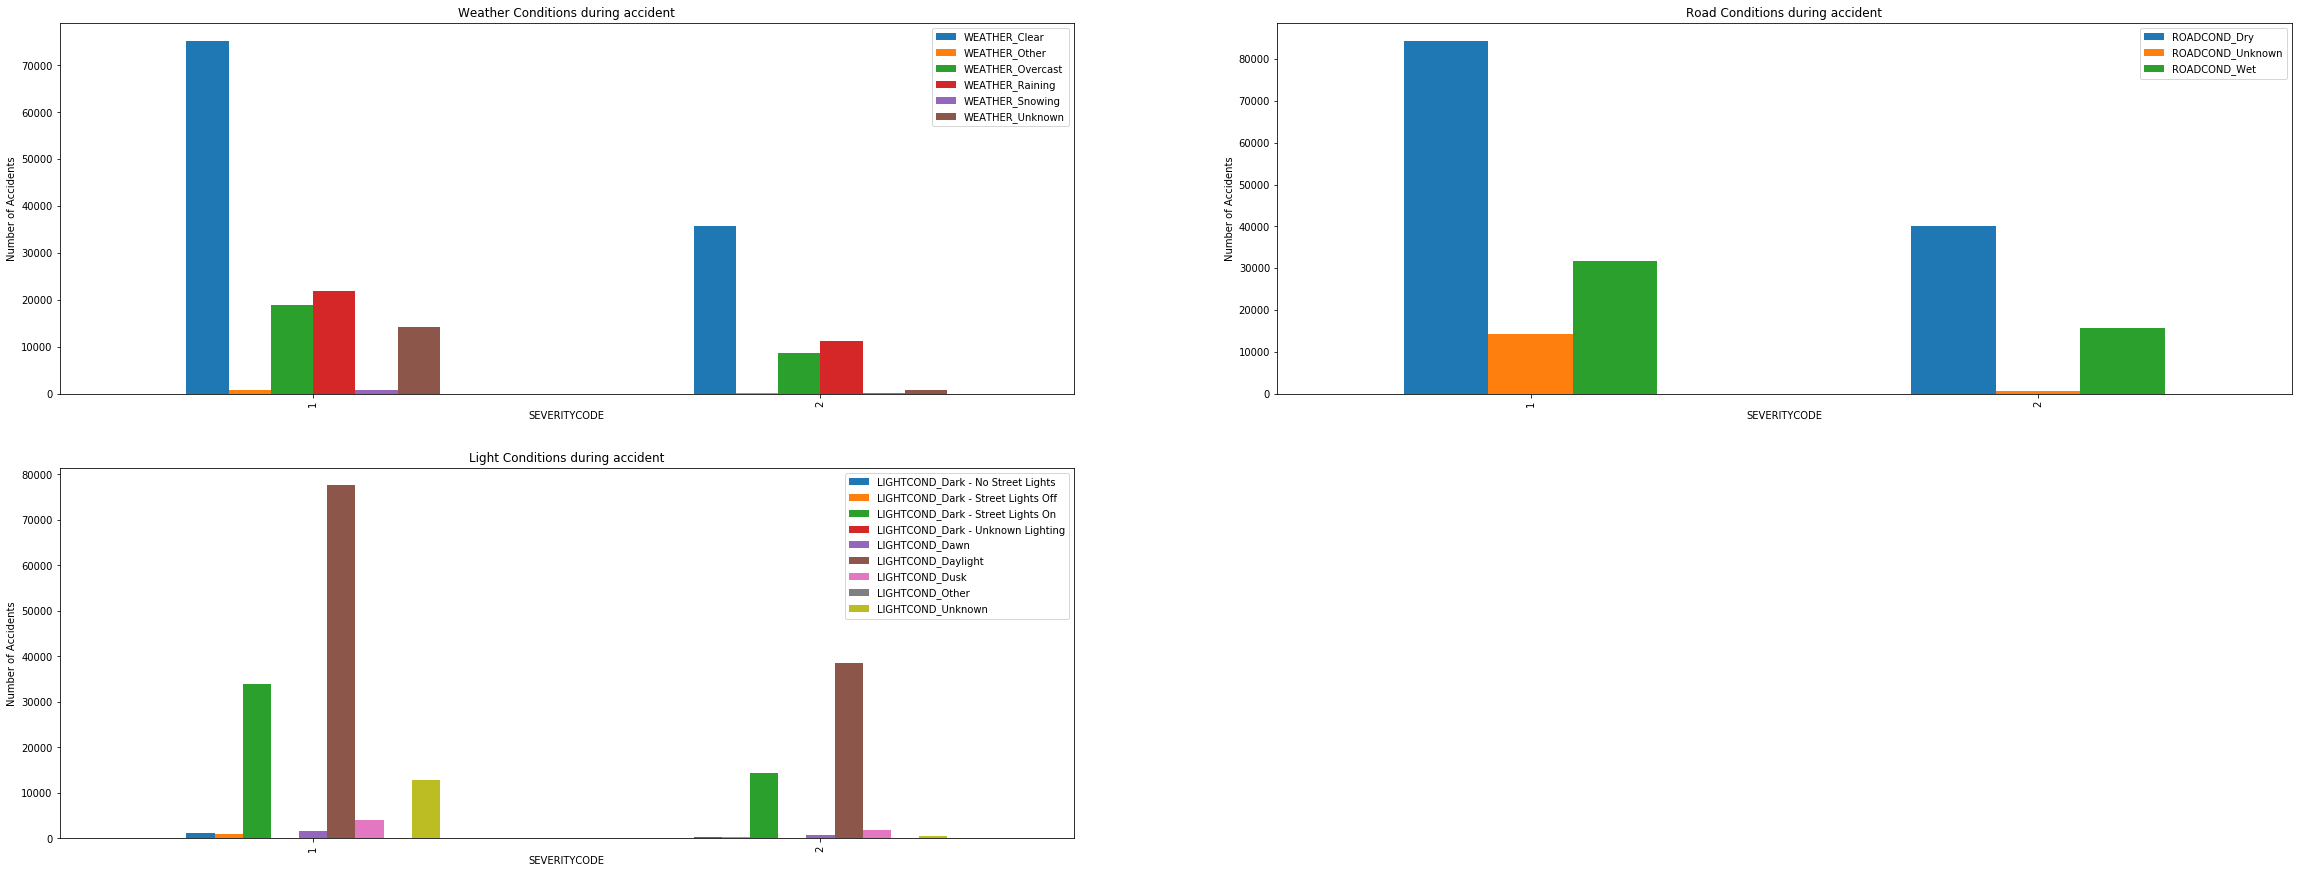

In [299]:
#Plot to see Trends
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)


ax0.set_ylabel('Number of Accidents')
ax0.set_title('Weather Conditions during accident')
ax1.set_ylabel('Number of Accidents')
ax1.set_title('Road Conditions during accident')
ax2.set_ylabel('Number of Accidents')
ax2.set_title('Light Conditions during accident')

stats_nature[['WEATHER_Clear', 'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Raining','WEATHER_Snowing', 'WEATHER_Unknown']].plot.bar(figsize=(40, 15),ax = ax0)
stats_nature[['ROADCOND_Dry','ROADCOND_Unknown', 'ROADCOND_Wet']].plot.bar(ax = ax1)
stats_nature[['LIGHTCOND_Dark - No Street Lights','LIGHTCOND_Dark - Street Lights Off','LIGHTCOND_Dark - Street Lights On','LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn','LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other','LIGHTCOND_Unknown']].plot.bar(ax = ax2)

In [179]:
#Group Data
df_human = df[['INATTENTIONIND', 'UNDERINFL','SPEEDING']]
df_human = pd.get_dummies(df_human[0:1000])
df_human = pd.concat([df['SEVERITYCODE'], df_human], axis = 1)

In [184]:
#Preprocess data
#Map everything to 0 or 1
mapping = {'N':0 , 'Y':1 }
df_human.replace({'UNDERINFL_0': mapping,'UNDERINFL_1':mapping}, inplace = True)
#df_human.drop(['UNDERINFL_0','UNDERINFL_1'], axis = 1, inplace= True)
df_human.head()

,SEVERITYCODE,INATTENTIONIND_Y,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
0,2,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0.0,1.0,0.0,0.0,0.0,0.0


In [185]:
df_human['UNDERINFL_N'] = pd.concat([df_human['UNDERINFL_0'], df_human['UNDERINFL_N']], axis = 1)
df_human['UNDERINFL_Y'] = pd.concat([df_human['UNDERINFL_1'], df_human['UNDERINFL_Y']], axis = 1)
df_human.head()

,SEVERITYCODE,INATTENTIONIND_Y,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
0,2,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,1.0,0.0,1.0,0.0,0.0


In [188]:
df_human.drop(['UNDERINFL_0','UNDERINFL_1'], axis = 1, inplace= True)

In [190]:
grouped = df_human.groupby('SEVERITYCODE')
stats_human = grouped.sum()
stats_human

,INATTENTIONIND_Y,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
SEVERITYCODE,,,,
1,87.0,348.0,7.0,27.0
2,43.0,136.0,10.0,12.0


In [191]:
stats_human.columns

Index(['INATTENTIONIND_Y', 'UNDERINFL_N', 'UNDERINFL_Y', 'SPEEDING_Y'], dtype='object')

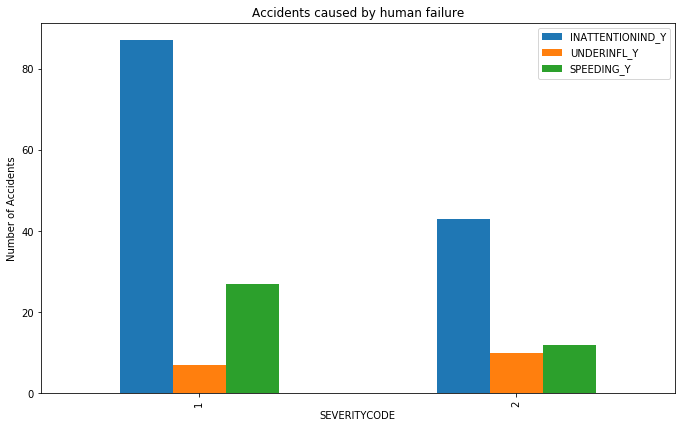

In [291]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221)
ax0.set_title('Accidents caused by human failure')
ax0.set_ylabel('Number of Accidents')
stats_human[['INATTENTIONIND_Y', 'UNDERINFL_Y', 'SPEEDING_Y']].plot.bar(figsize=(25, 15),ax = ax0)

In [233]:
#df_counts = df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_perscounts = df[['PERSONCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_perscounts = pd.concat([df_sev, df_perscounts], axis = 1)
grouped = df_perscounts.groupby('PERSONCOUNT')
stats_perscounts = grouped.sum()
stats_perscounts

,1,2
PERSONCOUNT,,
0,3782.0,1762.0
1,9858.0,3296.0
2,86420.0,27811.0
3,22092.0,13461.0
4,8365.0,6295.0
5,3615.0,2969.0
6,1345.0,1357.0
7,494.0,637.0
8,249.0,284.0


In [234]:
df_vecounts = df[['VEHCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_vecounts = pd.concat([df_sev, df_vecounts], axis = 1)
grouped = df_vecounts.groupby('VEHCOUNT')
stats_vecounts = grouped.sum()
stats_vecounts

,1,2
VEHCOUNT,,
0,3858.0,1227.0
1,11643.0,14105.0
2,111701.0,35949.0
3,7540.0,5470.0
4,1348.0,1078.0
5,268.0,261.0
6,86.0,60.0
7,24.0,22.0
8,10.0,5.0


In [229]:
df_pedcylcounts = df[['PEDCYLCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_pedcylcounts = pd.concat([df_sev, df_pedcylcounts], axis = 1)
grouped = df_pedcylcounts.groupby('PEDCYLCOUNT')
stats_pedcylcounts = grouped.sum()
stats_pedcylcounts

,1,2
PEDCYLCOUNT,,
0,135806.0,53383.0
1,679.0,4762.0
2,0.0,43.0


In [235]:
df_pedcounts = df[['PEDCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_pedcounts = pd.concat([df_sev, df_pedcounts], axis = 1)
grouped = df_pedcounts.groupby('PEDCOUNT')
stats_pedcounts = grouped.sum()
stats_pedcounts

,1,2
PEDCOUNT,,
0,135787.0,51947.0
1,678.0,6007.0
2,19.0,207.0
3,1.0,21.0
4,0.0,4.0
5,0.0,1.0
6,0.0,1.0


Text(0.5, 1.0, 'Number of Vehicles involved in Accident')

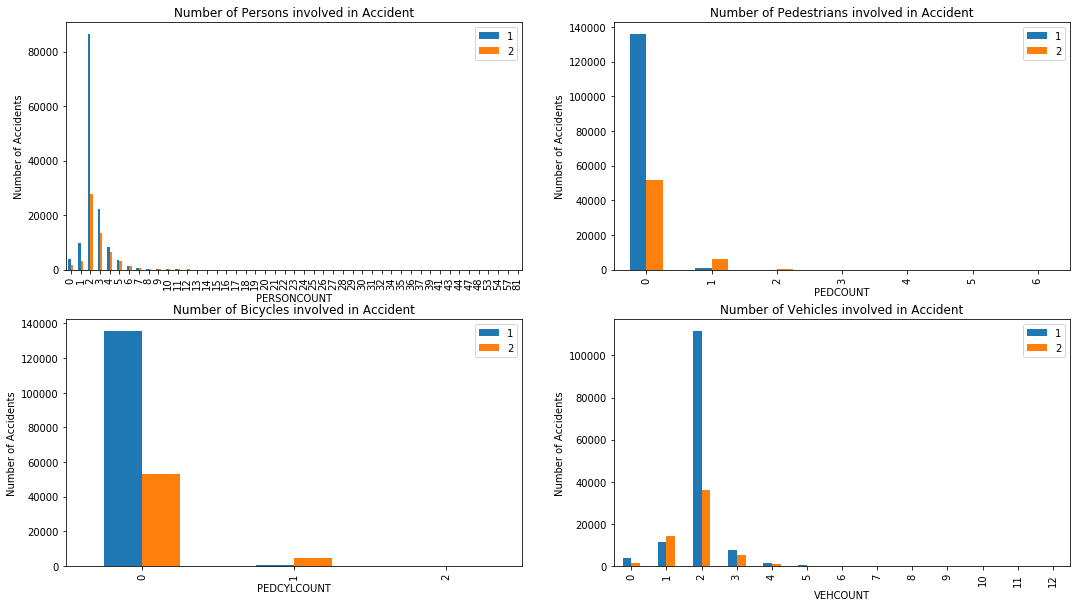

In [290]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

stats_perscounts.plot.bar(figsize=(18, 10),ax = ax0)
stats_pedcounts.plot.bar(figsize=(18, 10),ax = ax1)
stats_pedcylcounts.plot.bar(figsize=(18, 10),ax = ax2)
stats_vecounts.plot.bar(figsize=(18, 10),ax = ax3)
ax0.set_ylabel('Number of Accidents')
ax1.set_ylabel('Number of Accidents')
ax2.set_ylabel('Number of Accidents')
ax3.set_ylabel('Number of Accidents')
ax0.set_title('Number of Persons involved in Accident')
ax1.set_title('Number of Pedestrians involved in Accident')
ax2.set_title('Number of Bicycles involved in Accident')
ax3.set_title('Number of Vehicles involved in Accident')
#stats_nature[['ROADCOND_Dry','ROADCOND_Unknown', 'ROADCOND_Wet']].plot.bar(ax = ax1)
#stats_nature[[]].plot.bar(ax = ax2)

In [237]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [241]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [283]:
df_loc = df[['JUNCTIONTYPE','ADDRTYPE']]
df_loc = pd.get_dummies(df_loc)
df_loc = pd.concat([df['SEVERITYCODE'], df_loc], axis = 1)
grouped = df_loc.groupby('SEVERITYCODE')
stats_loc = grouped.sum()
stats_loc.rename({'JUNCTIONTYPE_At Intersection (but not related to intersection)':'At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)':'At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction':'Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)':'Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)':'Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Unknown':'Unknown', 'ADDRTYPE_Alley':'Alley', 'ADDRTYPE_Block':'Block',
       'ADDRTYPE_Intersection':'Intersection'})

,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection
SEVERITYCODE,,,,,,,,,,
1,1475.0,35636.0,7437.0,15493.0,70396.0,112.0,7.0,669.0,96830.0,37251.0
2,623.0,27174.0,3234.0,7297.0,19404.0,54.0,2.0,82.0,30096.0,27819.0


In [284]:
stats_loc.rename(columns = {'JUNCTIONTYPE_At Intersection (but not related to intersection)':'At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)':'At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction':'Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)':'Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)':'Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Unknown':'Unknown', 'ADDRTYPE_Alley':'Alley', 'ADDRTYPE_Block':'Block',
       'ADDRTYPE_Intersection':'Intersection'}, inplace = True)

In [285]:
stats_loc.columns

Index(['At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'JUNCTIONTYPE_Ramp Junction',
       'Unknown', 'Alley', 'Block', 'Intersection'],
      dtype='object')

Text(0.5, 1.0, 'Addresstype')

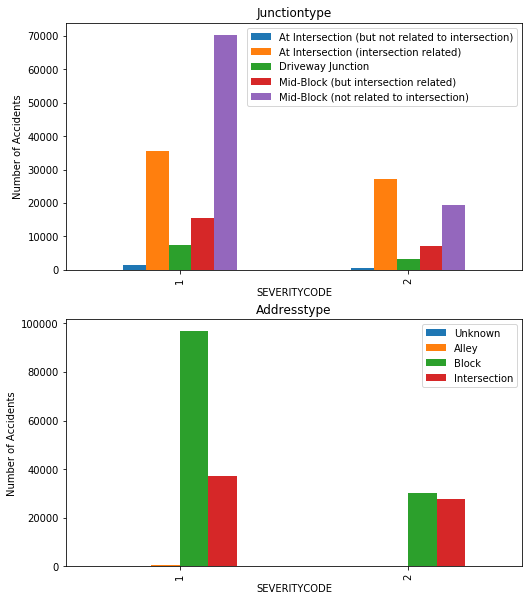

In [288]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(223)

stats_loc[['At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)']].plot.bar(figsize=(30, 25),ax = ax0)
ax0.set_ylabel('Number of Accidents')
ax0.set_title('Junctiontype')
stats_loc[['Unknown', 'Alley', 'Block','Intersection']].plot.bar(figsize=(18, 10),ax = ax1)
ax1.set_ylabel('Number of Accidents')
ax1.set_title('Addresstype')

In [248]:
#Location Analysis - > See where most Accidents happen
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
        return seperator.join(org_list)

In [264]:
stringlist = convert_list_to_string(list(df['LOCATION'].astype(str).unique()))
#stringlist

In [266]:
from collections import Counter 
# split() returns list of all the words in the string 
split_it =  stringlist.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(100) 
  
print(most_occur) 

[('ST', 28030), ('AVE', 27716), ('AND', 24104), ('BETWEEN', 16491), ('S', 15619), ('NE', 10026), ('N', 9381), ('SW', 8016), ('E', 6375), ('NW', 6121), ('W', 4429), ('WAY', 3504), ('PL', 1809), ('1ST', 858), ('DEAD', 835), ('END', 835), ('15TH', 781), ('RP', 687), ('8TH', 670), ('DR', 665), ('5TH', 603), ('4TH', 581), ('3RD', 580), ('6TH', 574), ('KING', 547), ('35TH', 535), ('2ND', 532), ('LAKE', 522), ('12TH', 510), ('45TH', 494), ('17TH', 494), ('14TH', 491), ('24TH', 481), ('42ND', 479), ('20TH', 479), ('30TH', 464), ('39TH', 458), ('23RD', 441), ('JR', 440), ('M', 439), ('L', 439), ('32ND', 428), ('16TH', 421), ('9TH', 407), ('25TH', 400), ('36TH', 391), ('22ND', 389), ('11TH', 383), ('65TH', 383), ('26TH', 380), ('46TH', 371), ('34TH', 370), ('28TH', 366), ('41ST', 363), ('40TH', 363), ('RAINIER', 358), ('50TH', 357), ('AURORA', 356), ('38TH', 356), ('WR', 355), ('7TH', 352), ('31ST', 345), ('SPOKANE', 344), ('ER', 344), ('BLVD', 344), ('BEACON', 342), ('37TH', 342), ('47TH', 337)

In [308]:
#Work with Month and Time when most accidents happen
df['INCDTTM'].head()
df['MONTH'] = pd.DatetimeIndex(df['INCDTTM']).month
df['TIME']= pd.DatetimeIndex(df['INCDTTM']).time
df[['TIME','MONTH']].head()

,TIME,MONTH
0,14:54:00,3
1,18:55:00,12
2,10:20:00,11
3,09:26:00,3
4,08:04:00,1


In [309]:
df_time = pd.concat([df['SEVERITYCODE'], df['TIME'], df['MONTH']], axis = 1)
df_time.head()

,SEVERITYCODE,TIME,MONTH
0,2,14:54:00,3
1,1,18:55:00,12
2,1,10:20:00,11
3,1,09:26:00,3
4,2,08:04:00,1


In [310]:
df_time['Time']= pd.DatetimeIndex(df['INCDTTM']).hour
df_time.drop('TIME',inplace = True)
df_time.head()

,SEVERITYCODE,TIME,MONTH,Time
0,2,14:54:00,3,14
1,1,18:55:00,12,18
2,1,10:20:00,11,10
3,1,09:26:00,3,9
4,2,08:04:00,1,8


In [312]:
df_time.drop(columns = 'TIME',axis = 1, inplace = True)
df_time.head()

,SEVERITYCODE,MONTH,Time
0,2,3,14
1,1,12,18
2,1,11,10
3,1,3,9
4,2,1,8


In [316]:
df_time['Time'].unique()

array([14, 18, 10,  9,  8, 17,  0, 13, 15, 12,  2, 20, 16, 22,  6, 11, 19,
        7, 21,  1,  3, 23,  5,  4])

In [313]:
df_month= df_time[['MONTH']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_month = pd.concat([df_sev, df_month], axis = 1)
grouped = df_month.groupby('MONTH')
stats_month= grouped.sum()
stats_month

,1,2
MONTH,,
1,11704.0,4703.0
2,10293.0,4097.0
3,11415.0,4735.0
4,11216.0,4762.0
5,11567.0,5196.0
6,11638.0,4928.0
7,11227.0,5137.0
8,11214.0,5082.0
9,11053.0,4811.0


In [314]:
df_time1= df_time[['Time']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_time1 = pd.concat([df_sev, df_time1], axis = 1)
grouped = df_time1.groupby('Time')
stats_time1= grouped.sum()
stats_time1

,1,2
Time,,
0,25129.0,9252.0
1,2577.0,831.0
2,2736.0,870.0
3,1316.0,349.0
4,950.0,272.0
5,1178.0,489.0
6,2182.0,1017.0
7,4389.0,2154.0
8,5878.0,2692.0


Text(0.5, 1.0, 'Times of Accidents')

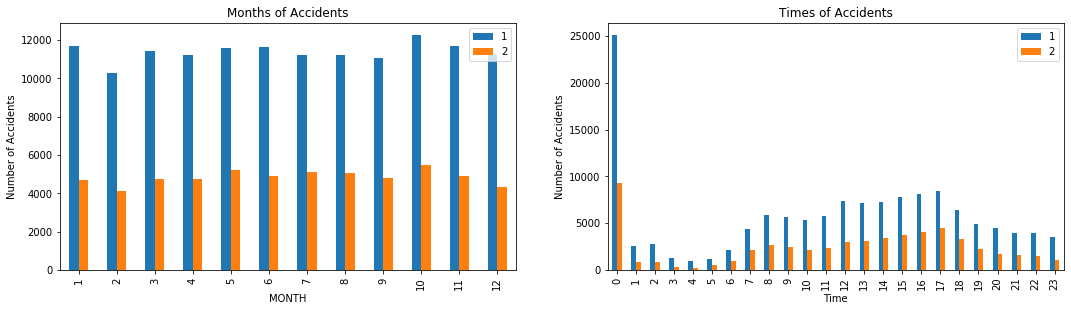

In [315]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)


stats_month.plot.bar(figsize=(18, 10),ax = ax0)
stats_time1.plot.bar(figsize=(18, 10),ax = ax1)

ax0.set_ylabel('Number of Accidents')
ax1.set_ylabel('Number of Accidents')

ax0.set_title('Months of Accidents')
ax1.set_title('Times of Accidents')
